In [1]:
import torch
from dvae.dataset.covid_dataset import HaddadDataset
from dvae.model import build_VRNN 
from dvae.utils import myconf
import matplotlib.pyplot as plt

In [2]:
torch.cuda.is_available()

True

In [3]:
cfg = myconf()
cfg.read("/home/victor.oliveira/DVAE-COVID/saved_model/COVID_2025-07-21-12h31_VRNN_z_dim=10/config.ini")

['/home/victor.oliveira/DVAE-COVID/saved_model/COVID_2025-07-21-12h31_VRNN_z_dim=10/config.ini']

In [4]:
val_windows = torch.load("/home/victor.oliveira/DVAE-COVID/saved_model/COVID_2025-07-21-12h31_VRNN_z_dim=10/valid_windows.pt")

In [5]:
ds = HaddadDataset(windows=val_windows, input_col_list=["Ct_Value"], context_length=12, mask_value=-1)


In [6]:
model = build_VRNN(cfg=cfg, device="cuda")
model.eval()

VRNN(
  (activation): Tanh()
  (feature_extractor_x): Sequential(
    (linear0): Linear(in_features=1, out_features=64, bias=True)
    (activation0): Tanh()
    (dropout0): Dropout(p=0.0, inplace=False)
  )
  (feature_extractor_z): Sequential(
    (linear0): Linear(in_features=10, out_features=16, bias=True)
    (activation0): Tanh()
    (dropout0): Dropout(p=0.0, inplace=False)
    (linear1): Linear(in_features=16, out_features=32, bias=True)
    (activation1): Tanh()
    (dropout1): Dropout(p=0.0, inplace=False)
  )
  (mlp_hx_z): Sequential(
    (Identity): Identity()
  )
  (inf_mean): Linear(in_features=128, out_features=10, bias=True)
  (inf_logvar): Linear(in_features=128, out_features=10, bias=True)
  (mlp_h_z): Sequential(
    (Identity): Identity()
  )
  (prior_mean): Linear(in_features=64, out_features=10, bias=True)
  (prior_logvar): Linear(in_features=64, out_features=10, bias=True)
  (mlp_hz_x): Sequential(
    (Identity): Identity()
  )
  (gen_out): Linear(in_features=96, 

In [7]:
IDX=0

input_window, target = ds[IDX]

input_window = input_window.to(torch.device("cuda"))
input_window = input_window.unsqueeze(1)

predicted_window = model(input_window)


In [8]:
predicted_window = predicted_window.squeeze()
predicted_window = predicted_window.detach().cpu().numpy()

target = target.squeeze()
target = target.cpu().numpy()

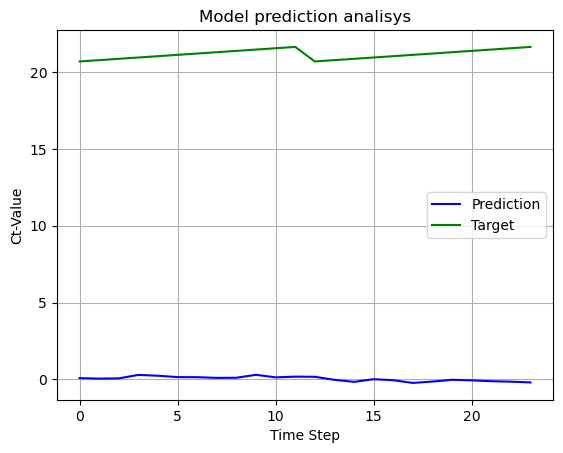

In [9]:
time = range(target.shape[0])
plt.plot(time, predicted_window, label='Prediction', color='blue')
plt.plot(time, target, label='Target', color='green')

plt.xlabel('Time Step')
plt.ylabel('Ct-Value')
plt.title('Model prediction analisys')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
IDX=0

input_window, target = ds[IDX]

input_window = input_window.to(torch.device("cuda"))
input_window = input_window.unsqueeze(1)

predicted_window = model(input_window)

target = target.to(torch.device("cuda"))
target = target.unsqueeze(1)
loss_recon = torch.nn.functional.mse_loss(predicted_window, target, reduction='sum')

In [11]:
loss_recon

tensor(10686.3750, device='cuda:0', grad_fn=<MseLossBackward0>)

In [13]:
loss_recon / 24

tensor(445.2656, device='cuda:0', grad_fn=<DivBackward0>)

In [ ]:
batch_data.permute(1, 0, 2)

In [17]:
IDX=2

input_window, target = ds[IDX]

input_window = input_window.to(torch.device("cuda"))
input_window = input_window.unsqueeze(1)
input_window.shape

torch.Size([24, 1, 1])